# .............................[Semester Project]................................
This script includes the implementation of the Decision tree for the Amazon Sentiment Analysis Dataset.
It takes the following libararies - pandas, numpy, matplotlib, scipy, sklearn.

In [2]:
import time
print ("Hello BSCS 7th Guys, it's %s " % time.asctime())

Hello BSCS 7th Guys, it's Wed Jan 26 09:52:29 2022 


#  ............................. [Samiullah Saleem]................................

# Data

We have 5 variables to consider on 3150 reviews.

# Rating 

The rating gave by the clients on the reviews, which is an integer number from 1 to 5.

# Date

The date of the review, an object which will further be transformed into datetime.

# Variation

Variation of the product, which is a characteristic differing the models of the product.

# Verified reviews

The full text of the reviews (verified reviews).

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"F:\csv files\amazon_alexa.tsv", sep = '\t')
df.shape

(3150, 5)

In [5]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
df.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [7]:
print("we have a total of {} reviews".format(df.shape[0]))
#print("Feedback = 1 mean a positive review and Feedback=0 means a negative review")

we have a total of 3150 reviews


In [8]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [9]:
df['feedback'].unique()

array([1, 0], dtype=int64)

In [10]:
positive = df[df['feedback'] == 1]
p = len(positive)
negative = df[df['feedback'] == 0]
n = len(negative)
print('Number of Positive reviews is {} and the negative reviews is {}'.format(p,n))
rat1 = len(df[df['rating']==1])
rat2 = len(df[df['rating']==2])
rat3 = len(df[df['rating']==3])
rat4 = len(df[df['rating']==4])
rat5 = len(df[df['rating']==5])

#print Ratings
print('{} rating = 1'.format(rat1))
print("{} rating = 2".format(rat2))
print("{} rating = 3".format(rat3))
print("{} rating = 4".format(rat4))
print("{} rating = 5".format(rat5))

Number of Positive reviews is 2893 and the negative reviews is 257
161 rating = 1
96 rating = 2
152 rating = 3
455 rating = 4
2286 rating = 5


<AxesSubplot:xlabel='rating', ylabel='count'>

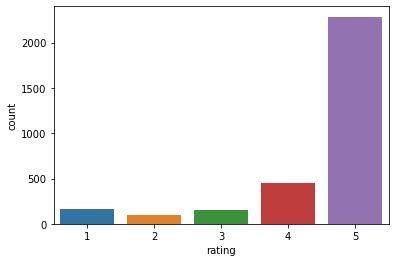

In [11]:
sns.countplot(x='rating', data=df)

In [12]:
df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [13]:
pos_feedback =  df[df['feedback']==1]
neg_feedback = df[df['feedback']==0]



e:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feedback', ylabel='count'>

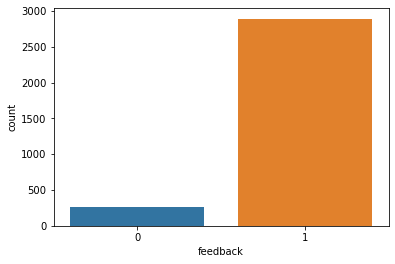

In [14]:
#visualization
sns.countplot(df['feedback'], label = "count")

In [15]:
pos_feedback

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [16]:
neg_feedback

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


In [17]:
df['length'] = df['verified_reviews'].apply(len)
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


Text(0.5, 1.0, 'Frequency for Length of Review')

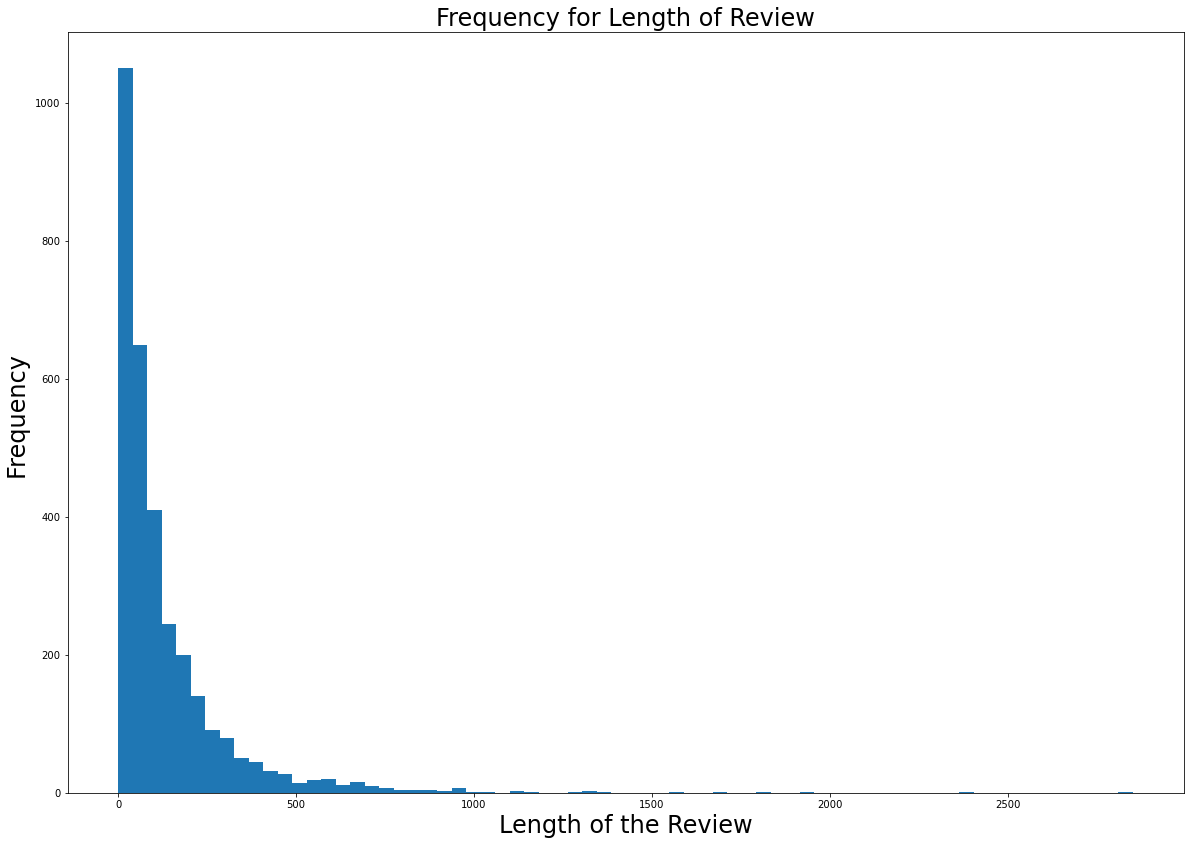

In [18]:
df['length'].plot(bins = 70,kind = 'hist',figsize=(20,14))
plt.xlabel("Length of the Review",fontsize=24)
plt.ylabel("Frequency ",fontsize=24)
plt.title("Frequency for Length of Review",fontsize=24)

In [19]:
df.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

We can conclude from the information above that:

Most of the reviews have around 300 characters


Most of the reviews have around 300 characters

The shortest review has 1 character and the longest review has 2851 characters


On average, reviews are 132 characters long.
The length of the review differs, on average, if the review is positive or negative. Positive reviews are, on average, 124 characters long and negative reviews are, on average, 215 characters long.

A quick superficial conclusion from that is that people who are unhappy with the product tend to write more on the review.

In [20]:
#shortest review:
df[df ['length']==1]['verified_reviews'].iloc[0]

'😍'

In [21]:
#longest review
df[df['length']==2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [22]:
df.variation.unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

<AxesSubplot:xlabel='variation', ylabel='rating'>

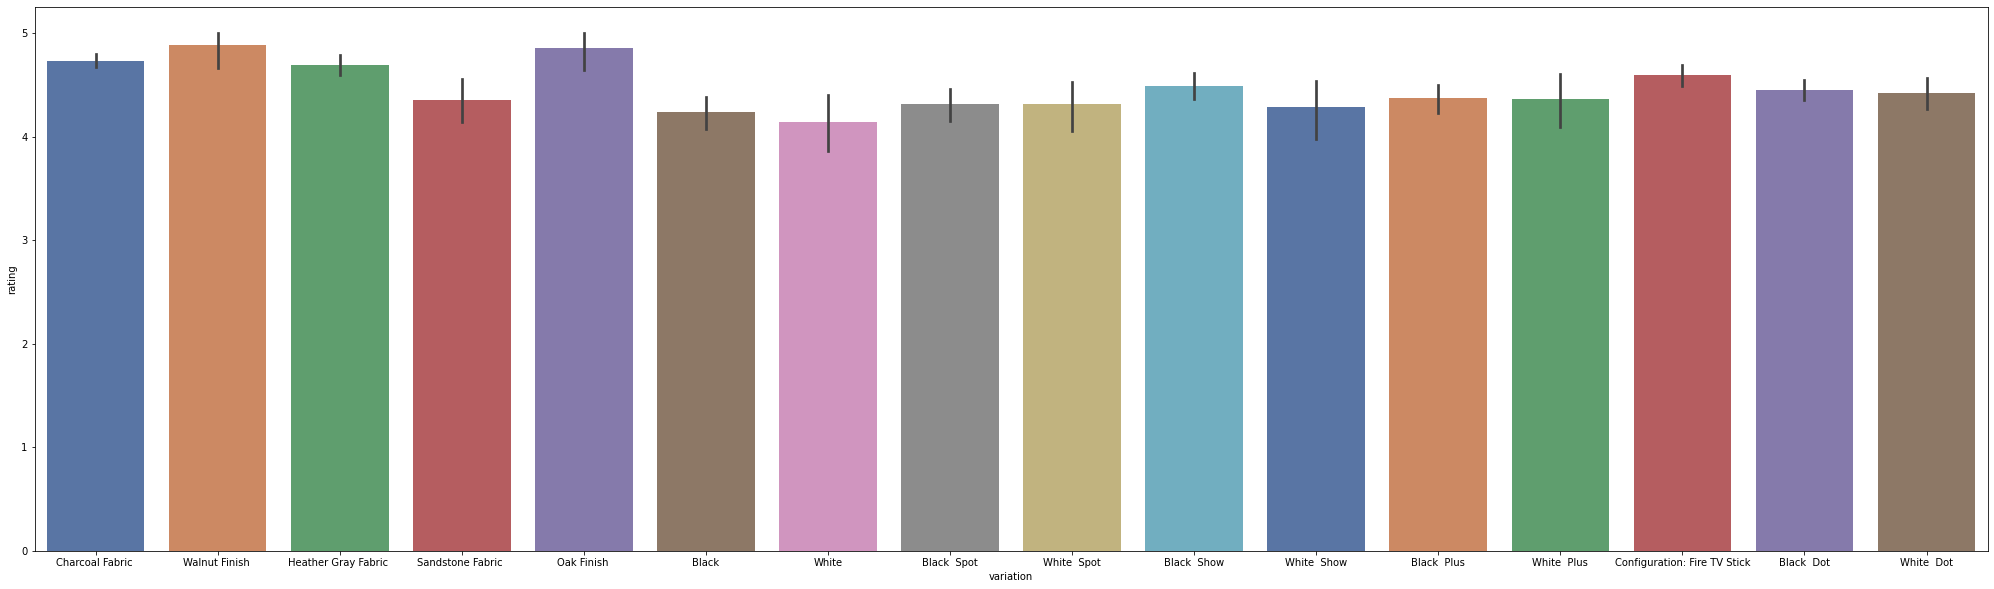

In [23]:
plt.figure(figsize=(35,10))
sns.barplot(x = 'variation', y='rating',data=df,palette="deep")

# Transforming the data and cleaning

Starting to prepare the data to create the wordcloud

In [24]:
sentence = df['verified_reviews'].tolist()
len(sentence)

3150

Now joining all reviews into one object , each review separated by a space.

In [25]:
sentence_str = ' '.join(sentence)
sentence_str

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [26]:
len(sentence_str)

419105

So we have an object with 419105 characters. For now on the work will focus on cleaning this data to keep only the elements necessary for the sentiment analysis of the reviews.

In [27]:
from wordcloud import WordCloud

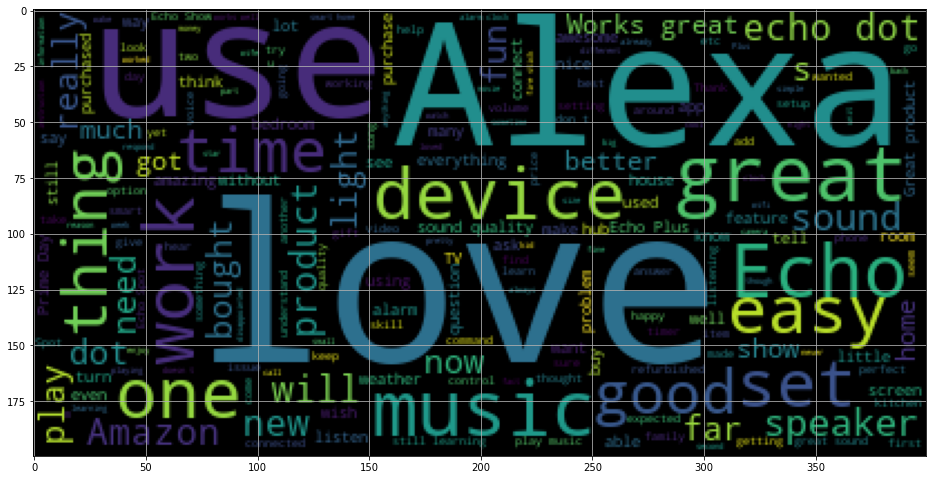

In [28]:
plt.figure(figsize=(16,14))
plt.grid(b=None)
plt.imshow(WordCloud().generate(sentence_str));

By having a quick look on the wordcloud we can see that words coming from positive reviews are more prevalent. To visualize most common words for each type of review, let's separate the wordcloud for positive reviews and negative reviews.

# Wordcloud only for the Positive reviews:

In [29]:
positive_list = positive['verified_reviews'].tolist()
positive_str = ' '.join(positive_list)
len(positive_str)

363531

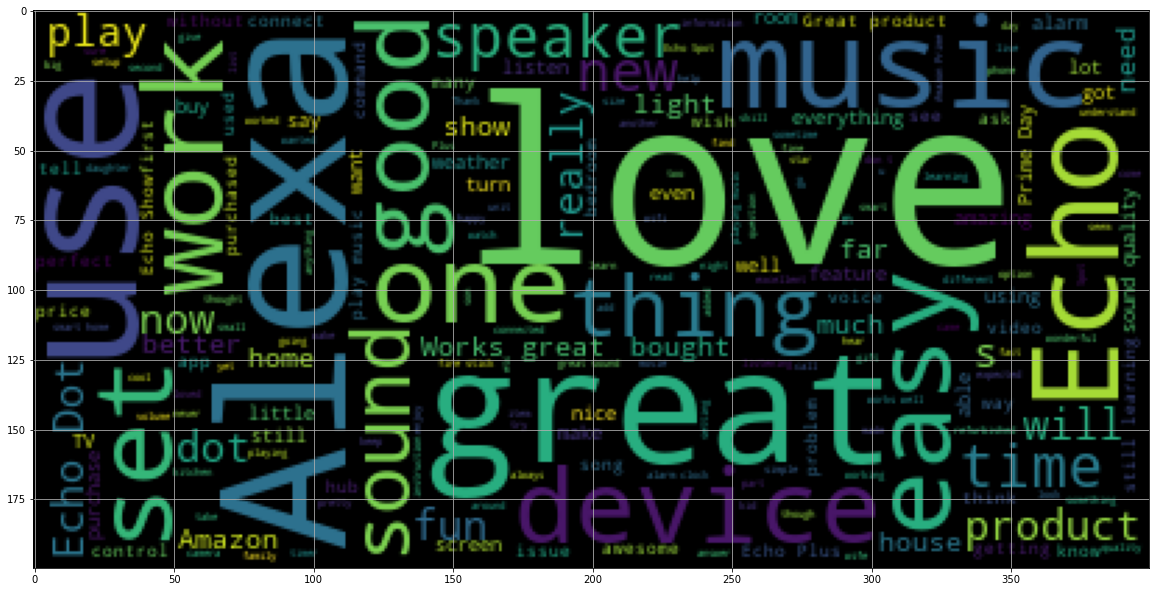

In [30]:
plt.figure(figsize=(20,20))
plt.grid(b=None)
plt.imshow(WordCloud().generate(positive_str))

# Wordcloud only for the negative reviews:


In [31]:
negative_list = negative['verified_reviews'].tolist()
negative_str = ' '.join(negative_list)
len(negative_str)


55573

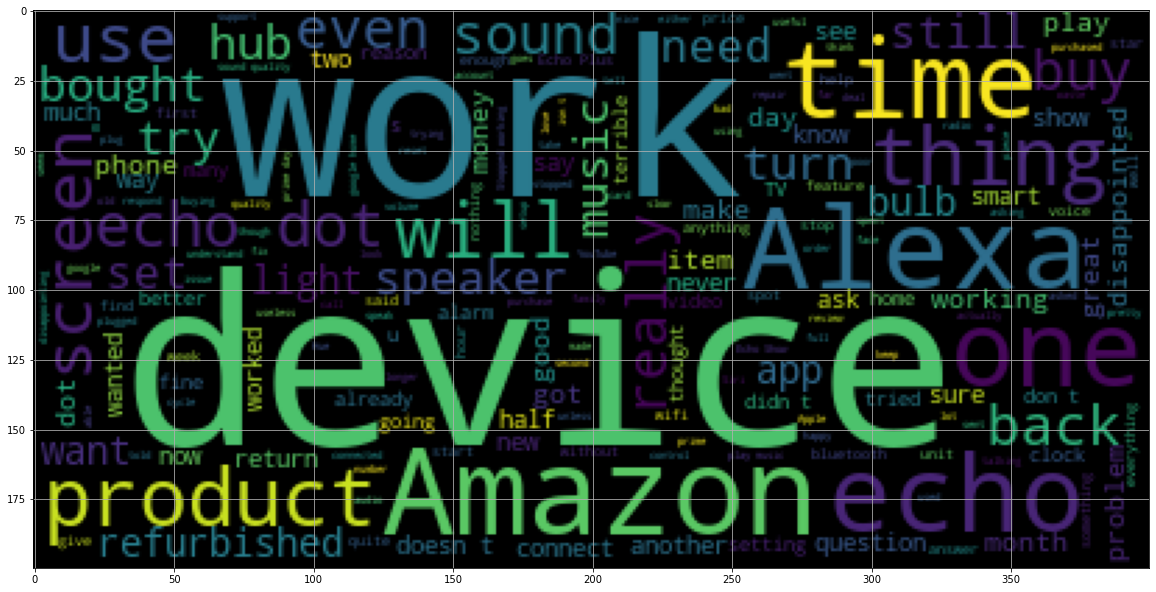

In [32]:
plt.figure(figsize=(20,14))
plt.grid(b=None)
plt.imshow(WordCloud().generate(negative_str))

In [33]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [34]:
df = df.drop(['date','rating'],axis=1)

In [35]:
df


,variation,verified_reviews,feedback,length
0,Charcoal Fabric,Love my Echo!,1,13
1,Charcoal Fabric,Loved it!,1,9
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,Charcoal Fabric,Music,1,5
...,...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,Black Dot,"Listening to music, searching locations, check...",1,135
3147,Black Dot,"I do love these things, i have them running my...",1,441
3148,White Dot,Only complaint I have is that the sound qualit...,1,380


# DUMMIES?


A dummy variable is a variable that takes values of 0 and 1, where the values indicate the presence or absence of something (e.g., a 0 may indicate a placebo and 1 may indicate a drug). ... Dummy variables are also known as indicator variables, design variables, contrasts, one-hot coding, and binary basis variables.

# Transforming categorical values into numerical


Many machine learning algorithms cannot work with categorical data directly, so it is a common practice to transform categorical data into numerical to prepare the model for training.

One hot encoder is a way of creating categories when a simple 0 for negative and 1 for positive is not possible or easy to implement.

In [36]:
#from sklearn.preprocessing import OneHotEncoder
#onehotencoder = OneHotEncoder()
#enc = onrhotencoder.fit_transform(enc).toarray()
#enc.shape
#type_enc
#enc = pd.DataFrame(enc)
#enc.head()

In [37]:
variation_dummies = pd.get_dummies(df['variation'], drop_first = True)

In [38]:
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [39]:
df = df.drop(['variation'],axis=1)
df

,verified_reviews,feedback,length
0,Love my Echo!,1,13
1,Loved it!,1,9
2,"Sometimes while playing a game, you can answer...",1,195
3,I have had a lot of fun with this thing. My 4 ...,1,172
4,Music,1,5
...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,50
3146,"Listening to music, searching locations, check...",1,135
3147,"I do love these things, i have them running my...",1,441
3148,Only complaint I have is that the sound qualit...,1,380


In [40]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
lovetesting = 'i am IN LOVE WITH SOMEONE WITH DEEP OF HIS HEART'
test_punc_removed = [char for char in lovetesting if char not in string.punctuation]
print(test_punc_removed)

['i', ' ', 'a', 'm', ' ', 'I', 'N', ' ', 'L', 'O', 'V', 'E', ' ', 'W', 'I', 'T', 'H', ' ', 'S', 'O', 'M', 'E', 'O', 'N', 'E', ' ', 'W', 'I', 'T', 'H', ' ', 'D', 'E', 'E', 'P', ' ', 'O', 'F', ' ', 'H', 'I', 'S', ' ', 'H', 'E', 'A', 'R', 'T']


We can see that the comma after the word 'game' was removed. It is shown by a blank space ' '.

# NLTK to Remove stopwords


In [42]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Tokenizing

Tokenization means breaking down text content into its parts:

Words
Terms
Symbols Or other types of textual elements.
This process of breaking down the content into smaller parts makes it easy the process of cleaning the data.

In [43]:
def cleaning(message):
    text = [char for char in message if char not in string.punctuation]
    text = ' '.join(text)
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return text

In [44]:
df_clean = df['verified_reviews'].apply(cleaning)

In [45]:
print(df['verified_reviews'][100])

Great fun getting to know all the functions of this product.  WOW -- family fun and homework help.  Talking with other grandchildren,who also have an Echo, is a HUGE bonus.  Can't wait to learn more and more and more


In [46]:
print(df_clean[100])

['G', 'r', 'e', 'f', 'u', 'n', 'g', 'e', 'n', 'g', 'k', 'n', 'w', 'l', 'l', 'h', 'e', 'f', 'u', 'n', 'c', 'n', 'f', 'h', 'p', 'r', 'u', 'c', 'W', 'W', 'f', 'l', 'f', 'u', 'n', 'n', 'h', 'e', 'w', 'r', 'k', 'h', 'e', 'l', 'p', 'l', 'k', 'n', 'g', 'w', 'h', 'h', 'e', 'r', 'g', 'r', 'n', 'c', 'h', 'l', 'r', 'e', 'n', 'w', 'h', 'l', 'h', 'v', 'e', 'n', 'E', 'c', 'h', 'H', 'U', 'G', 'E', 'b', 'n', 'u', 'C', 'n', 'w', 'l', 'e', 'r', 'n', 'r', 'e', 'n', 'r', 'e', 'n', 'r', 'e']


We can confirm that the stopwords and punctuation were removed.

Transforming the text information into a vector with count vectorizer:

In [47]:
df_clean

0                                      [L, v, e, E, c, h]
1                                               [L, v, e]
2       [e, e, w, h, l, e, p, l, n, g, g, e, u, c, n, ...
3       [h, v, e, h, l, f, f, u, n, w, h, h, h, n, g, ...
4                                                  [u, c]
                              ...                        
3145    [P, e, r, f, e, c, f, r, k, u, l, n, e, v, e, ...
3146    [L, e, n, n, g, u, c, e, r, c, h, n, g, l, c, ...
3147    [l, v, e, h, e, e, h, n, g, h, v, e, h, e, r, ...
3148    [n, l, c, p, l, n, h, v, e, h, h, e, u, n, q, ...
3149                                                  [G]
Name: verified_reviews, Length: 3150, dtype: object

In [48]:
nf = pd.concat([df, variation_dummies],axis=1)
nf

,verified_reviews,feedback,length,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,195,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,172,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,135,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,441,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,380,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# CountVectorizer

CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.
The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer  = CountVectorizer(analyzer=cleaning)
alexa_countvectorizer = vectorizer.fit_transform(df['verified_reviews'])
alexa_countvectorizer.shape

(3150, 82)

Visualizing the unique words extracted by the vectorizer:

In [50]:
print(vectorizer.get_feature_names())

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'B', 'C', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'N', 'P', 'Q', 'R', 'U', 'V', 'W', 'X', 'Z', 'b', 'c', 'e', 'f', 'g', 'h', 'j', 'k', 'l', 'n', 'p', 'q', 'r', 'u', 'v', 'w', 'x', 'z', 'á', 'é', 'í', 'ñ', 'ó', 'ú', '\u200b', '—', '‘', '’', '“', '”', '‼', '⏰', '❤', '⭐', '️', '🎶', '🏻', '🏾', '👍', '💋', '😁', '😂', '😄', '😉', '😊', '😍', '😎', '😏', '😑', '😔', '😥', '😬', '😳', '🤓']


In [51]:
print(alexa_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [52]:
nf.drop(['verified_reviews'], axis =1 ,inplace=True )
nf

,feedback,length,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,195,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,172,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,135,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,441,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,1,380,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Encoding

Encoding is a technique of converting categorical variables into numerical values so that it could be easily fitted to a machine learning model.

In [53]:
encoded_reviews = pd.DataFrame(alexa_countvectorizer.toarray())
nf = pd.concat([nf,encoded_reviews],axis =1)
nf

,feedback,length,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,...,72,73,74,75,76,77,78,79,80,81
0,1,13,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,195,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,172,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,5,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,50,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,135,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,441,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,380,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
encoded_reviews = pd.DataFrame(alexa_countvectorizer.toarray())
nf= pd.concat([nf, encoded_reviews], axis=1) 
nf

,feedback,length,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,...,72,73,74,75,76,77,78,79,80,81
0,1,13,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,195,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,172,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,5,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,50,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,135,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,441,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,380,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X= nf.drop(['feedback'], axis= 1)
X

,length,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,72,73,74,75,76,77,78,79,80,81
0,13,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,172,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,50,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,135,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,441,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,380,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y= nf['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =5 )
X_train.shape
X_test.shape

(630, 180)

In [58]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier = RandomForestClassifier(n_estimators= 100 , criterion='entropy')
randomforest_classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

<AxesSubplot:>

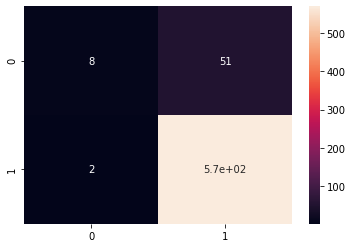

In [59]:
y_predict = randomforest_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot = True)

In [60]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.14      0.23        59
           1       0.92      1.00      0.96       571

    accuracy                           0.92       630
   macro avg       0.86      0.57      0.59       630
weighted avg       0.91      0.92      0.89       630



In [61]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

e:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<AxesSubplot:>

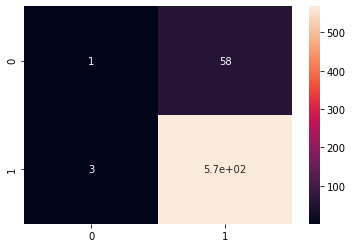

In [62]:
y_predict = logistic.predict(X_test)
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot = True)

In [63]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.25      0.02      0.03        59
           1       0.91      0.99      0.95       571

    accuracy                           0.90       630
   macro avg       0.58      0.51      0.49       630
weighted avg       0.85      0.90      0.86       630



In [64]:
from sklearn.metrics import accuracy_score
print("accuracy:", accuracy_score(y_test,y_predict))

accuracy: 0.9031746031746032


In [66]:
#The solver for weight optimization.
#Activation function for the hidden layer.
#The ith element represents the number of neurons in the ith hidden layer.
#L2 penalty (regularization term) parameter.
#Learning rate schedule for weight updates.
#The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.
#Maximum number of iterations. 
#Whether to print progress messages to stdout.
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
sami = MLPClassifier(hidden_layer_sizes = (600,), activation='relu',solver='sgd',alpha=0.0001,verbose=True,learning_rate='constant',learning_rate_init=0.001,max_iter=50)
sami = sami.fit(X_train,y_train)
y_pred = sami.predict(X_test)
print("accuracy score::",accuracy_score(y_pred,y_test))
if accuracy_score(y_pred,y_test)>0.85:
    print("Samiullah you have succesfully trained the model with good accuracy ")
else:
    print("loss")

Iteration 1, loss = 1.70626802
Iteration 2, loss = 2.08862314
Iteration 3, loss = 0.85280432
Iteration 4, loss = 0.53434949
Iteration 5, loss = 0.48538317
Iteration 6, loss = 0.46232978
Iteration 7, loss = 0.45045186
Iteration 8, loss = 0.43141908
Iteration 9, loss = 0.43351474
Iteration 10, loss = 0.40370013
Iteration 11, loss = 0.39869954
Iteration 12, loss = 0.44547761
Iteration 13, loss = 0.40014810
Iteration 14, loss = 0.39172135
Iteration 15, loss = 0.36443117
Iteration 16, loss = 0.38176090
Iteration 17, loss = 0.36528013
Iteration 18, loss = 0.40100984
Iteration 19, loss = 0.35304844
Iteration 20, loss = 0.42957249
Iteration 21, loss = 0.36118811
Iteration 22, loss = 0.34473483
Iteration 23, loss = 0.47313827
Iteration 24, loss = 0.35262182
Iteration 25, loss = 0.34032692
Iteration 26, loss = 0.34680429
Iteration 27, loss = 0.43307592
Iteration 28, loss = 0.33945406
Iteration 29, loss = 0.33388367
Iteration 30, loss = 0.36177044
Iteration 31, loss = 0.36797689
Iteration 32, los

e:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
